In [ ]:
import numpy as np
import matplotlib.pyplot as plt


## Exercice 2 : maximum de vraisemblance

### <span style="color:blue">QUESTION 2.1 :</span> 

Tirer 10 fois une pièce à pile ou face et modéliser les résultats obtenus comme ceux d'une variable aléatoire X qui vaut X_i=0 si on a pile et X_i=1 si on a face.

Calculez le maximum de vraisemblance du paramètre p d'un loi de Bernoulli qui modéliserait le problème. Pour y arriver, différentes valeures possibles de p seront testées et le p retenu sera celui qui a la plus grande vraisemblance.


- Vérifier empiriquement comment évolue ce maximum de vraisemblance si l'on effectue de plus en plus de tirages
- Que se passe-t-il quand il y a trop de tirages ? Représenter la log-vraisemblance plutot que la vraisemblance dans ce cas.




In [2]:
NbTirages=100
NbPiles = np.random.randn(NbTirages) > 0
NbPiles = np.sum(NbPiles)
NbFaces=NbTirages-NbPiles


PossibleValuesForP=np.linspace(0.01,0.99,100)


def vraisemblance(n_pile, n_face, p):
    
    return (p)**n_pile*(1-p)**n_face


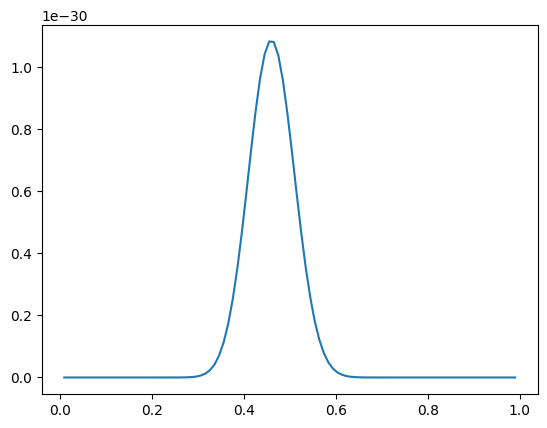

In [3]:
plt.plot(PossibleValuesForP, vraisemblance(NbPiles, NbFaces, PossibleValuesForP))

In [4]:
index = np.argmax(vraisemblance(NbPiles, NbFaces, PossibleValuesForP))
print(f'Best p = {PossibleValuesForP[index]:.3f}')

Best p = 0.455



### <span style="color:blue">QUESTION 2.2 :</span> 


Vérifier empiriquement comment évolue ce maximum de vraisemblance si l'on effectue de plus en plus de tirages. Pour éviter de tirer des centaines de fois à pile ou face, vous pourrez juste modifier *NbTirages¨et *NbPiles* dans le code, puis voir le comportement de la courbe *plt.plot(PossibleValuesForP,CorrespondingLikelihood)*.


### <span style="color:blue">REPONSE 2.2 :</span> 



In [5]:
tirages = [100,101,102]
CorrespondingLikelihood = [[] for _ in range(len(tirages))]

for i, NbTirages in enumerate(tirages):
    NbPiles = np.random.randn(NbTirages) > 0
    NbPiles = np.sum(NbPiles)
    NbFaces=NbTirages-NbPiles

    CorrespondingLikelihood[i] = vraisemblance(NbPiles, NbFaces, PossibleValuesForP)

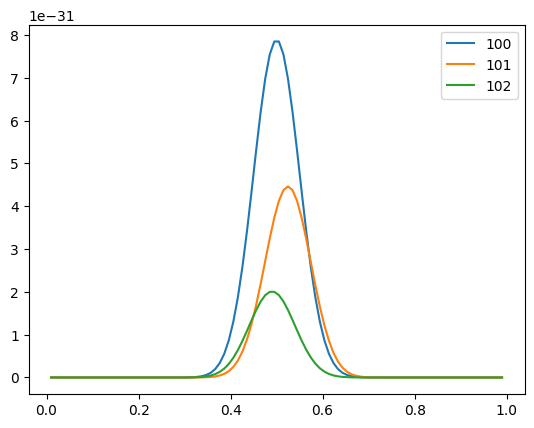

In [6]:
for i, corr in enumerate(CorrespondingLikelihood):
    plt.plot(PossibleValuesForP, corr, label=tirages[i])
plt.legend()
plt.show()

In [7]:
tirages = np.linspace(100, 200, num=5, dtype=int)
maxLikelihood = []

for NbTirages in tirages:
    NbPiles = np.random.randn(NbTirages) > 0
    NbPiles = np.sum(NbPiles)
    NbFaces=NbTirages-NbPiles

    max_lik = np.max(vraisemblance(NbPiles, NbFaces, PossibleValuesForP))
    maxLikelihood.append(max_lik)

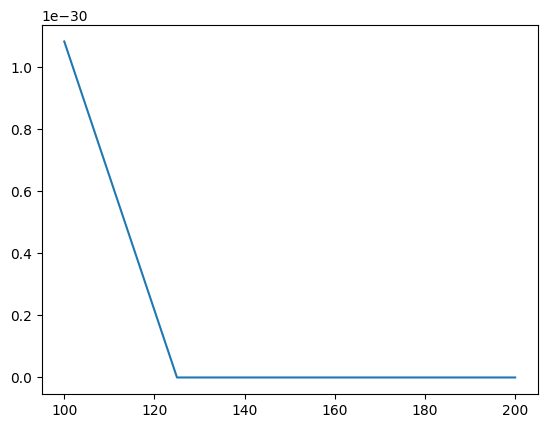

In [9]:
plt.plot(tirages, maxLikelihood)
plt.show()

### <span style="color:blue">QUESTION 2.3 :</span> 


Que se passe-t-il quand il y a trop de tirages ? Représenter la log-vraisemblance plutot que la vraisemblance dans ce cas.

### <span style="color:blue">REPONSE 2.3 :</span> 


In [10]:
NbTirages=2000
NbPiles = np.random.randn(NbTirages) > 0
NbPiles = np.sum(NbPiles)
NbFaces=NbTirages-NbPiles

PossibleValuesForP=np.linspace(0.01,0.99,100)


def log_vraisemblance(n_pile, n_face, p):
    
    return n_pile*np.log(p) + n_face*np.log(1-p)

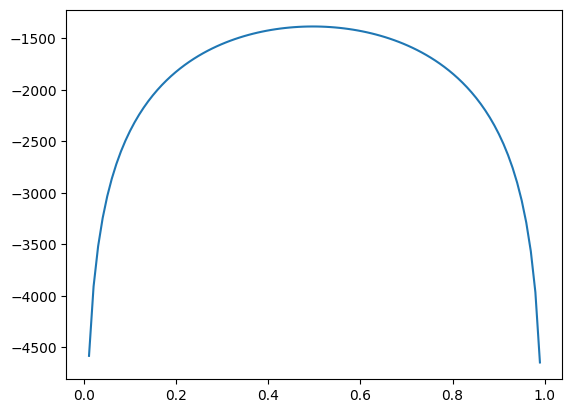

In [11]:
plt.plot(PossibleValuesForP, log_vraisemblance(NbPiles, NbFaces, PossibleValuesForP))